# Wine Quality Prediction

# Part 1. Linear Regression

## 1a.) Training a linear regression model the predict the wine quality score with feature selection. (70% training set : 30% test set)

In [149]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

wine = pd.read_csv('wine_quality.csv')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


In [150]:
wine_train, wine_test = train_test_split(wine, test_size=0.3, random_state=88)

wine_train.shape, wine_test.shape

((4547, 13), (1950, 13))

In [151]:
wine_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
5314,10.6,0.48,0.64,2.2,0.111,6.0,20.0,0.9970,3.26,0.66,11.7,1,6
1160,7.5,0.14,0.34,1.3,0.055,50.0,153.0,0.9945,3.29,0.80,9.6,0,6
3690,5.6,0.21,0.24,4.4,0.027,37.0,150.0,0.9910,3.30,0.31,11.5,0,7
5459,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.9978,3.23,0.58,9.2,1,5
752,6.7,0.20,0.42,14.0,0.038,83.0,160.0,0.9987,3.16,0.50,9.4,0,6


In [152]:
target_column = 'quality'
feature_columns = [col for col in wine_train.columns if col != target_column]
all_features = ' + '.join(feature_columns)
all_features

'fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

In [153]:
ols = smf.ols(formula = 'quality ~' + all_features, data=wine_train)
model1 =ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     158.1
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:39:31   Log-Likelihood:                -5027.6
No. Observations:                4547   AIC:                         1.008e+04
Df Residuals:                    4534   BIC:                         1.016e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              100.1841 

In [154]:
regressors = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']

# function to compute VIFs

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values,i) for i in range(num_columns)]
    return pd.Series(vif[1:], index = columns)

VIF(wine_train, regressors)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


fixed_acidity            4.817241
volatile_acidity         2.121607
citric_acid              1.614725
residual_sugar           9.320133
chlorides                1.651829
free_sulfur_dioxide      2.214714
total_sulfur_dioxide     3.961942
density                 21.611229
pH                       2.467010
sulphates                1.543964
alcohol                  5.444707
type                     6.703327
dtype: float64

In [155]:
# remove density from the list of regressors (high VIF)

model1_without_density = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol + type', data = wine_train).fit()

print(model1_without_density.summary())
print(VIF(wine_train, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol', 'type']))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     167.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:39:31   Log-Likelihood:                -5045.6
No. Observations:                4547   AIC:                         1.012e+04
Df Residuals:                    4535   BIC:                         1.019e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3421 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [156]:
# remove pH from list of regressors in addition to density (highly insignificant p-value)

model1_without_pH = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + alcohol + type', data = wine_train).fit()

print(model1_without_pH.summary())
print(VIF(wine_train, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'type']))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     184.7
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:39:32   Log-Likelihood:                -5045.7
No. Observations:                4547   AIC:                         1.011e+04
Df Residuals:                    4536   BIC:                         1.018e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4878 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [157]:
# remove fixed_acidity as a regressor in addition to density and pH (highly insignificant p-value)\

model1_without_fixed_acidity = smf.ols(formula = 'quality ~ volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + alcohol + type', data = wine_train).fit()

print(model1_without_fixed_acidity.summary())
print(VIF(wine_train, ['volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'type']))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:39:32   Log-Likelihood:                -5045.8
No. Observations:                4547   AIC:                         1.011e+04
Df Residuals:                    4537   BIC:                         1.018e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.5138 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [158]:
# remove citric_acid as a regressor in addition to density, pH, and fixed_acidity (highly insignificant p-value)
# model1_without_citric_acid

model1_final = smf.ols(formula = 'quality ~ volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + sulphates + alcohol + type', data = wine_train).fit()

print(model1_final.summary())
print(VIF(wine_train, ['volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'alcohol', 'type']))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     230.8
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:39:32   Log-Likelihood:                -5046.1
No. Observations:                4547   AIC:                         1.011e+04
Df Residuals:                    4538   BIC:                         1.017e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.5015 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Ultimately my final linear regression model included: volatile_acidity, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, sulphates, alcohol, and type as the independent variables to predict the quality of the wine. I chose variables to include in my linear regression model by removing a variable one-by-one starting with the highest VIF while continuously recomputing the VIFs after removing the variable until all of the remaining variables have a VIF low enough (generally below 5). In addition, I also removed variables that had a high p-value that remained after using VIFs to eliminate the outliers until all of the remaining regressors have a p-value significant at our traditional cutoff levels of  1% and 5%.

## 1b.) Predicting wine quality scores using the linear regression model above.

In [159]:
# Using my final linear regression model to predict quality scores for the test data and appending it to compare with actual quality

quantity_prediction = model1_final.predict(wine_test)
wine_test_copy = wine_test
wine_test_copy['quality_hat'] = quantity_prediction
wine_test_results = wine_test_copy.iloc[:, [12,13]]
wine_test_results

,quality,quality_hat
5534,5,4.565673
3429,5,5.948929
4899,5,4.873529
3091,6,5.725694
645,5,5.372204
...,...,...
145,6,5.904938
5902,5,5.736617
2047,5,5.348696
4973,5,5.812864


## 1c.) Post-Processing: Refine the predicted quality scores (continuous) to integer values between 0 and 10.


In [160]:
# rounding the predicted quality to integers

y_temp = wine_test_results['quality_hat']
y_approximation = []

for i in y_temp:
    
    y_temp_round = np.around(i)
    y_approximation.append(int(y_temp_round))
  
wine_test_results['quality_hat_rounded'] = y_approximation # appending the rounded quality predictions
wine_test_results

/tmp/ipykernel_134/2855118256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_test_results['quality_hat_rounded'] = y_approximation # appending the rounded quality predictions


,quality,quality_hat,quality_hat_rounded
5534,5,4.565673,5
3429,5,5.948929,6
4899,5,4.873529,5
3091,6,5.725694,6
645,5,5.372204,5
...,...,...,...
145,6,5.904938,6
5902,5,5.736617,6
2047,5,5.348696,5
4973,5,5.812864,6


In [161]:
# count how many accurate predictions we had by comparing the actual quality with the rounded predicted quality for each row

expected = [];
predicted = [];
count = 0 # count is the number of accurate predictions from our training set model

for i in wine_test_results['quality']:
    
    expected.append(i)
    
for j in wine_test_results['quality_hat_rounded']:

    predicted.append(i)
    
for k in range(1950):
    
    if (expected[k] == predicted[k]):
        
        count = count + 1
        
count

645

In [162]:
# compute accuracy for the test set

accuracy = count/len(wine_test) 
accuracy

0.33076923076923076

# Part 2: Logistic Regression

## 2a.) Training a Logistic Regression model to predict the wine quality score with feature selection.

$$
\text{Pr}(Y = 1 | X, Z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1^T X + \beta_2 Z)}}
$$




In [163]:
# quality of 7 or greater is considered premium
premium_or_not = [] # stores boolean indicator for whether the wine is premium or not

for i in wine_train['quality']:
    
    if (i >= 7):
        
        premium_or_not.append(1)
        
    else:
            
        premium_or_not.append(0)
            
wine_train['premium'] = premium_or_not

logreg = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + type', data = wine_train)
logreg_model = logreg.fit()

logreg_model.summary()

Optimization terminated successfully.
         Current function value: 0.388998
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4535
Method:                           MLE   Df Model:                           11
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2142
Time:                        17:39:34   Log-Likelihood:                -1768.8
converged:                       True   LL-Null:                       -2251.0
Covariance Type:            nonrobust   LLR p-value:                8.568e-200
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              757.3910     37.185     20.368      0.000     684.510     830.272
fixed_acidity            0.7901      0.063     12.600      0.000       0.667       0.913
volatile_acidity        -4.0173      0.464     -8.656      0.000      -4.927      -3.108
citric_acid             -0.1652      0.414     -0.399      0.690      -0.977       0.646
residual_sugar           0.3433      0.021     16.708      0.000       0.303       0.384
chlorides               -6.9843      2.837     -2.461      0.014     -12.546      -1.423
free_sulfur_dioxide      0.0098      0.003      2.820      0.005       0.003       0.017
total_sulfur_dioxide    -0.0022      0.002     -1.386      0.166      -0.005       0.001
density               -783.5069     38.358    -20.426      0.000    -858.686    -708.328
pH                       3.7800      0.362     10.445      0.000       3.071       4.489
sulphates                3.0408      0.322      9.442      0.000       2.410       3.672
type                     1.7036      0.259      6.589      0.000       1.197       2.210
========================================================================================
"""

In [164]:
# remove citric_acid as regressor given high p-value (greater than 0.05)

logreg_without_citric_acid = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + type', data = wine_train)
logreg_model_without_citric_acid = logreg_without_citric_acid.fit()

logreg_model_without_citric_acid.summary()

Optimization terminated successfully.
         Current function value: 0.389016
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4536
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2142
Time:                        17:39:34   Log-Likelihood:                -1768.9
converged:                       True   LL-Null:                       -2251.0
Covariance Type:            nonrobust   LLR p-value:                9.201e-201
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              755.1810     36.745     20.552      0.000     683.162     827.200
fixed_acidity            0.7803      0.058     13.541      0.000       0.667       0.893
volatile_acidity        -3.9608      0.442     -8.967      0.000      -4.827      -3.095
residual_sugar           0.3422      0.020     16.804      0.000       0.302       0.382
chlorides               -7.0811      2.823     -2.509      0.012     -12.613      -1.549
free_sulfur_dioxide      0.0099      0.003      2.847      0.004       0.003       0.017
total_sulfur_dioxide    -0.0023      0.002     -1.448      0.148      -0.005       0.001
density               -781.2352     37.906    -20.610      0.000    -855.530    -706.940
pH                       3.7719      0.361     10.444      0.000       3.064       4.480
sulphates                3.0305      0.321      9.441      0.000       2.401       3.660
type                     1.7015      0.259      6.581      0.000       1.195       2.208
========================================================================================
"""

In [165]:
# remove total_sulfur_dioxide in addition to citric_acid given its high p-value (greater then 0.05)
# this is my final model for 2a

logreg_model1_final = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + density + pH + sulphates + type', data = wine_train).fit()
logreg_model1_final.summary()

Optimization terminated successfully.
         Current function value: 0.389247
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4537
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2137
Time:                        17:39:34   Log-Likelihood:                -1769.9
converged:                       True   LL-Null:                       -2251.0
Covariance Type:            nonrobust   LLR p-value:                2.449e-201
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             770.4157     35.378     21.777      0.000     701.077     839.754
fixed_acidity           0.7895      0.057     13.759      0.000       0.677       0.902
volatile_acidity       -4.0691      0.438     -9.300      0.000      -4.927      -3.212
residual_sugar          0.3452      0.020     17.004      0.000       0.305       0.385
chlorides              -7.1027      2.838     -2.503      0.012     -12.664      -1.541
free_sulfur_dioxide     0.0069      0.003      2.480      0.013       0.001       0.012
density              -796.8700     36.509    -21.827      0.000    -868.426    -725.314
pH                      3.7901      0.361     10.499      0.000       3.083       4.498
sulphates               3.0147      0.320      9.408      0.000       2.387       3.643
type                    1.9061      0.219      8.717      0.000       1.477       2.335
=======================================================================================
"""

### My final logistic regression model for 2a had the variables: fixed_acidity, volatile_acidity, residual_sugar, chlorides, free_sulfur_dioxide, density, pH, suIphates, and type as the independent variables. I chose the those regressors to keep by using backward elimination. That is to say I started with the full model that included all the independent variables of interest, and then removing one variable at a time based on its p-value until all remaining variables have a p-value below the threshold of 0.05.

## 2b.) Computing the accuracy and confusion matrix for my Logistic Regression Model.

In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
threshold = 0.5

premium_boolean = [] # stores boolean indicator for whether the wine is premium or not

for i in wine_test['quality']:
    
    if (i >= 7):
        
        premium_boolean.append(1)
        
    else:
            
        premium_boolean.append(0)
            
wine_test['premium'] = premium_boolean

y_test_logreg1 = wine_test['premium']
y_prob_logreg1 = logreg_model1_final.predict(wine_test)
y_pred_logreg1 = pd.Series((y_prob_logreg1 >= threshold).astype(int), index=y_prob_logreg1.index)
cm = confusion_matrix(y_test_logreg1, y_pred_logreg1)

print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[1493   72]
 [ 305   80]]


In [168]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / cm.sum()

print('Accuracy:', round(accuracy, 4))

Accuracy: 0.8067


## 2c.) Training a new model that predicts the wine quality score using the form below:

$$
\text{Pr}(Y = 1 | X, Z) = Z\left(\frac{1}{1 + e^{-(\alpha_0 + \alpha_1^T X)}}\right) + (1 - Z)\left(\frac{1}{1 + e^{-(\beta_0 + \beta_1^T X)}}\right)$$



In [169]:
# partition our training data into subsets 

red_wine_train = wine_train.loc[wine_train['type'] == 1] # type = 1 means red wine
white_wine_train = wine_train.loc[wine_train['type'] == 0] # type = 0 means white wine

#train the sigmoid functions independently 

logreg_red_wine = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates', data = red_wine_train).fit()
logreg_red_wine.summary()

Optimization terminated successfully.
         Current function value: 0.284868
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 1073
Model:                          Logit   Df Residuals:                     1062
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2869
Time:                        17:39:35   Log-Likelihood:                -305.66
converged:                       True   LL-Null:                       -428.64
Covariance Type:            nonrobust   LLR p-value:                 3.846e-47
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              646.0343     87.453      7.387      0.000     474.629     817.440
fixed_acidity            0.5462      0.131      4.160      0.000       0.289       0.804
volatile_acidity        -2.4345      0.900     -2.705      0.007      -4.199      -0.670
citric_acid              2.1595      1.005      2.148      0.032       0.189       4.130
residual_sugar           0.3855      0.073      5.295      0.000       0.243       0.528
chlorides              -10.2042      3.806     -2.681      0.007     -17.664      -2.745
free_sulfur_dioxide      0.0063      0.014      0.434      0.664      -0.022       0.035
total_sulfur_dioxide    -0.0144      0.005     -2.805      0.005      -0.024      -0.004
density               -664.7793     89.840     -7.400      0.000    -840.863    -488.695
pH                       2.3991      1.030      2.329      0.020       0.380       4.418
sulphates                3.9387      0.617      6.381      0.000       2.729       5.148
========================================================================================
"""

In [170]:
# remove free_sulfur_dioxide as a regressor (high p-value)

logreg_red_wine_final = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + total_sulfur_dioxide + density + pH + sulphates', data = red_wine_train).fit()
logreg_red_wine_final.summary()

Optimization terminated successfully.
         Current function value: 0.284955
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 1073
Model:                          Logit   Df Residuals:                     1063
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2867
Time:                        17:39:36   Log-Likelihood:                -305.76
converged:                       True   LL-Null:                       -428.64
Covariance Type:            nonrobust   LLR p-value:                 7.808e-48
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              647.4938     87.191      7.426      0.000     476.602     818.386
fixed_acidity            0.5547      0.130      4.269      0.000       0.300       0.809
volatile_acidity        -2.5017      0.888     -2.818      0.005      -4.242      -0.762
citric_acid              2.0676      0.983      2.104      0.035       0.142       3.993
residual_sugar           0.3858      0.073      5.268      0.000       0.242       0.529
chlorides              -10.0587      3.795     -2.650      0.008     -17.497      -2.620
total_sulfur_dioxide    -0.0129      0.004     -3.522      0.000      -0.020      -0.006
density               -666.5539     89.551     -7.443      0.000    -842.071    -491.036
pH                       2.4938      1.005      2.481      0.013       0.523       4.464
sulphates                3.9456      0.616      6.405      0.000       2.738       5.153
========================================================================================
"""

### Above is my final model for the Z=1 portion of the sigmoid function. Similar to part 2a, I used backwards elimination to choose the regressors to keep.

In [171]:
logreg_white_wine = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates', data = white_wine_train).fit()
logreg_white_wine.summary()

Optimization terminated successfully.
         Current function value: 0.415561
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 3474
Model:                          Logit   Df Residuals:                     3463
Method:                           MLE   Df Model:                           10
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2005
Time:                        17:39:36   Log-Likelihood:                -1443.7
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                3.981e-149
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              789.1574     44.246     17.836      0.000     702.437     875.877
fixed_acidity            0.7169      0.080      8.983      0.000       0.561       0.873
volatile_acidity        -4.5284      0.584     -7.751      0.000      -5.674      -3.383
citric_acid             -0.9273      0.483     -1.921      0.055      -1.873       0.019
residual_sugar           0.3527      0.024     14.997      0.000       0.307       0.399
chlorides              -11.4867      4.466     -2.572      0.010     -20.240      -2.734
free_sulfur_dioxide      0.0087      0.004      2.348      0.019       0.001       0.016
total_sulfur_dioxide     0.0011      0.002      0.594      0.553      -0.002       0.005
density               -814.8409     45.585    -17.875      0.000    -904.186    -725.496
pH                       3.8337      0.400      9.585      0.000       3.050       4.618
sulphates                2.6517      0.389      6.817      0.000       1.889       3.414
========================================================================================
"""

In [172]:
# remove total_sulfur_dioxide as a regressor (high p-value)
logreg_white_wine_without_total_sulfur_dioxide = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + density + pH + sulphates', data = white_wine_train).fit()
logreg_white_wine_without_total_sulfur_dioxide.summary()

Optimization terminated successfully.
         Current function value: 0.415611
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 3474
Model:                          Logit   Df Residuals:                     3464
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.2004
Time:                        17:39:36   Log-Likelihood:                -1443.8
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                5.132e-150
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             780.4397     41.635     18.745      0.000     698.837     862.042
fixed_acidity           0.7148      0.080      8.973      0.000       0.559       0.871
volatile_acidity       -4.4407      0.564     -7.873      0.000      -5.546      -3.335
citric_acid            -0.8952      0.479     -1.869      0.062      -1.834       0.043
residual_sugar          0.3503      0.023     15.137      0.000       0.305       0.396
chlorides             -11.3265      4.438     -2.552      0.011     -20.025      -2.628
free_sulfur_dioxide     0.0100      0.003      3.406      0.001       0.004       0.016
density              -805.9797     42.967    -18.758      0.000    -890.194    -721.765
pH                      3.8325      0.400      9.588      0.000       3.049       4.616
sulphates               2.6534      0.389      6.828      0.000       1.892       3.415
=======================================================================================
"""

In [173]:
# remove citric acid as a regressor in addition to total sulfur dioxide (high p-value)

logreg_white_wine_final = smf.logit(formula = 'premium ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + density + pH + sulphates', data = white_wine_train).fit()
logreg_white_wine_final.summary()

Optimization terminated successfully.
         Current function value: 0.416129
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                premium   No. Observations:                 3474
Model:                          Logit   Df Residuals:                     3465
Method:                           MLE   Df Model:                            8
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.1994
Time:                        17:39:36   Log-Likelihood:                -1445.6
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                3.103e-150
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             775.2537     41.431     18.712      0.000     694.050     856.458
fixed_acidity           0.6758      0.077      8.818      0.000       0.526       0.826
volatile_acidity       -4.2536      0.555     -7.664      0.000      -5.341      -3.166
residual_sugar          0.3474      0.023     15.058      0.000       0.302       0.393
chlorides             -11.4418      4.398     -2.601      0.009     -20.062      -2.822
free_sulfur_dioxide     0.0097      0.003      3.326      0.001       0.004       0.015
density              -800.6735     42.756    -18.726      0.000    -884.474    -716.873
pH                      3.7981      0.398      9.543      0.000       3.018       4.578
sulphates               2.6092      0.387      6.735      0.000       1.850       3.368
=======================================================================================
"""

### Above is my final model for the Z=0 portion of the sigmoid function. Similar to part 2a, I used backwards elimination to choose the regressors to keep.

### Because our logistic model assumes the use of two sigmoid functions that depend on whether Z=0 or Z=1, we can train them separately. We can accomplish this by dividing our training data (X,Z) into two subsets: (X,Z=1) and (X, Z=0). When Z=1, we can fit the corresponding X feature data using maximum likelihood estimation to the sigmoid function parameterized by alpha's, and the same for beta's when Z=0. For the separate models, I removed regressors based on the p-value threshold of 0.05 until all remaining  regressors were significant at the 5% level. Afterward, we can merge the two fitted logistic models to create the complete logistic model that computes the Pr(Y=1|X).  

## 2d.)

In [174]:
# try our new model on test set (if red wine then use red_wine model, else if white wine use white_wine model)

red_wine_test = wine_test.loc[wine_test['type'] == 1] # test set data that has type = 1 indicating its red wine 
white_wine_test = wine_test.loc[wine_test['type'] == 0] # type = 0 means white wine

In [175]:
# red wine model confusion matrix for (X,Z=1)

threshold = 0.5
            
y_test_red_wine = red_wine_test['premium']
y_prob_red_wine = logreg_red_wine_final.predict(red_wine_test)
y_pred_red_wine = pd.Series((y_prob_red_wine >= threshold).astype(int), index=y_prob_red_wine.index)
cm_red_wine = confusion_matrix(y_test_red_wine, y_pred_red_wine)

print("Confusion Matrix: \n", cm_red_wine)

Confusion Matrix: 
 [[438  18]
 [ 52  18]]


In [176]:
# white wine model confusion matrix for (X,Z=0)

threshold = 0.5

y_test_white_wine = white_wine_test['premium']
y_prob_white_wine = logreg_white_wine_final.predict(white_wine_test)
y_pred_white_wine = pd.Series((y_prob_white_wine >= threshold).astype(int), index=y_prob_white_wine.index)
cm_white_wine = confusion_matrix(y_test_white_wine, y_pred_white_wine)

print("Confusion Matrix: \n", cm_white_wine)

Confusion Matrix: 
 [[1046   63]
 [ 246   69]]


In [177]:
# combine the two confusion matrices to form the confusion matrix for the complete model

cm_combined = cm_red_wine + cm_white_wine
print("Confusion Matrix: \n", cm_combined)

Confusion Matrix: 
 [[1484   81]
 [ 298   87]]


In [178]:
# compute accuracy using the completed confusion matrix

TN, FP, FN, TP = cm_combined.ravel()
accuracy = (TP + TN) / cm_combined.sum()

print('Accuracy:', round(accuracy, 4))

Accuracy: 0.8056


# Part 3: Linear Discriminant Analysis

## 3a.)

In [179]:
# create the training set and test sets using the same regressors as my model from 2a.

X_train = wine_train.drop(['premium'], axis = 1)
X_train = X_train.drop(['quality'], axis = 1)
X_train = X_train.drop(['citric_acid'], axis = 1)
X_train = X_train.drop(['total_sulfur_dioxide'], axis = 1)

X_test = wine_test.drop(['premium'], axis = 1)
X_test = X_test.drop(['quality_hat'], axis = 1)
X_test = X_test.drop(['quality'], axis = 1)
X_test = X_test.drop(['citric_acid'], axis = 1)
X_test = X_test.drop(['total_sulfur_dioxide'], axis = 1)


y_train = wine_train['premium']
y_test = wine_test['premium']

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_prob = logreg_model1_final.predict(wine_test)

y_prob_lda = lda.predict_proba(X_test)
# print(y_prob_lda) # col0: prob(Y=0), col1: prob(Y=1)
y_pred_lda = pd.Series([1 if x > 1/2 else 0 for x in y_prob_lda[:,1]], index=y_prob.index)

## 3b.)

In [181]:
# confusion matrix for our lda model

cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[1484   81]
 [ 281  104]]

Accuracy: 0.8143589743589743


## 3c.)

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [183]:
# combine the calculated y_prob's for the (X,Z=1) and (X,Z=0) subsets in model 2c
y_prob_combined = pd.DataFrame(y_prob_red_wine.append(y_prob_white_wine, ignore_index = False), columns = ['y_prob_combined'])
y_prob_combined

,y_prob_combined
5534,0.003627
4899,0.006808
6110,0.052474
5782,0.015086
6370,0.281449
...,...
3600,0.220126
2239,0.014262
145,0.125208
2047,0.024095


In [184]:
# sort the y_probs to the correct rows that they are associated with for 2c

wine_test_with_y_prob = pd.merge(wine_test, y_prob_combined, left_index = True, right_index = True)
wine_test_with_y_prob

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality,quality_hat,premium,y_prob_combined
5534,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,1,5,4.565673,0,0.003627
3429,7.1,0.180,0.39,14.5,0.051,48.0,156.0,0.99947,3.35,0.78,9.1,0,5,5.948929,0,0.217057
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5,4.873529,0,0.006808
3091,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,0,6,5.725694,0,0.132565
645,6.3,0.260,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,0,5,5.372204,0,0.035729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.3,0.255,0.37,1.1,0.040,37.0,114.0,0.99050,3.00,0.39,10.9,0,6,5.904938,0,0.125208
5902,8.2,0.430,0.29,1.6,0.081,27.0,45.0,0.99603,3.25,0.54,10.3,1,5,5.736617,0,0.053053
2047,6.8,0.340,0.44,6.6,0.052,28.0,156.0,0.99550,3.14,0.41,9.6,0,5,5.348696,0,0.024095
4973,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,1,5,5.812864,0,0.105037


In [185]:
# extract the y_prob and y_test for model 2c
y_prob_combined_sorted = wine_test_with_y_prob['y_prob_combined']
y_test_combined = wine_test_with_y_prob['premium']

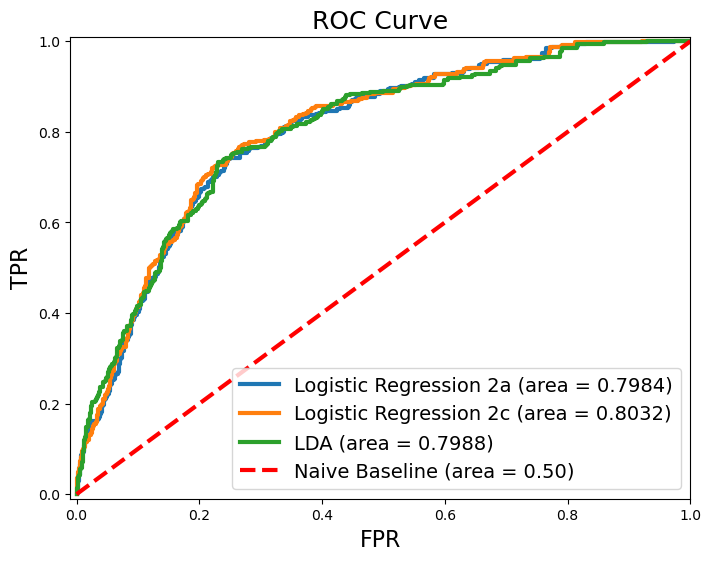

In [186]:
# adding first logistic model ROC curve
fpr_logit1, tpr_logit1, _ = roc_curve(y_test_logreg1, y_prob_logreg1) # FPR, TPR, thresholds
roc_auc_logit1 = auc(fpr_logit1, tpr_logit1)

# combine the sigmoid functions from 2c
fpr_logit2, tpr_logit2, _ = roc_curve(y_test_combined, y_prob_combined_sorted)
roc_auc_logit2 = auc(fpr_logit2, tpr_logit2)

# adding the lda model ROC curve
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)


plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_logit1, tpr_logit1, lw=3, label='Logistic Regression 2a (area = {:0.4f})'.format(roc_auc_logit1))
plt.plot(fpr_logit2, tpr_logit2, lw=3, label='Logistic Regression 2c (area = {:0.4f})'.format(roc_auc_logit2))
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.4f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)') # plotting baseline model
plt.legend(loc='lower right', fontsize=14)
plt.show()

### We know that the AUC of a ROC curve is a measure of how well the model can distinguish between positive and negative classes, regardless of the classification threshold. It ranges from 0 to 1, with 0.5 indicating random performance and 1 indicating perfect performance. In other words, the AUC is a summary of the ROC curve that provides a single number to represent the overall quality of a classification model. A higher AUC indicates better classification performance, while a lower AUC indicates poorer performance.Therefore, these are the 4 ROC curves produced each of the models and it appears that 2a, 2c, and LDA all had very similar performance with model 2c performing just slightly better than the other two.
